In [1]:
# Initialization
import numpy as np
import scipy
from matplotlib import pyplot as plt

#Poissons eq. using FDM
alpha = np.array([0.297104, 1.236745, 5.749982, 38.216677])

N = 1000
a = float(0)
b = float(5)
h = (b-a)/N

rho = np.arange(1,N+1)*h
hydrogen_density = 1/np.pi*np.exp(-2*rho)

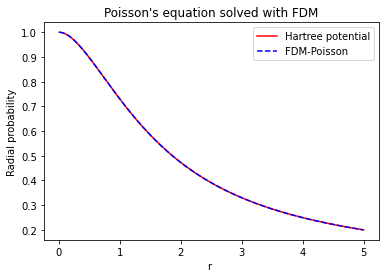

In [2]:
# Task 2
def generate_hartree_analytical(r):
    V_H = np.zeros(N)
    for i in range(0,N):
        V_H[i] = rho[i]**-1 - (1 + rho[i]**-1) * np.e**(-2*rho[i])
    return V_H

def generate_poisson_solution_FDM(rho):
    #A = coeff matrix for the discrete domain
    _A = np.diag(-2*np.ones(N),0) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)
    temp_potential = -4*np.pi*h**2*rho*hydrogen_density
    temp_potential[-1] -= 1
    U_0 = np.linalg.solve(_A,temp_potential)
    U = U_0 * rho**-1
    return U

    #U = U_0 * rho**-1
    #return U

#Plot hartree vs Poisson
plt.figure()
plt.plot(rho,generate_hartree_analytical(rho),'red',label = r"Hartree potential")
plt.plot(rho,generate_poisson_solution_FDM(rho),'b--', label = r"FDM-Poisson")
plt.title("Poisson's equation solved with FDM")
plt.xlabel("r ")
plt.ylabel("Radial probability")
plt.legend()

Calculated ground state energy: -13.508874632860392


Text(0, 0.5, 'U (r)')

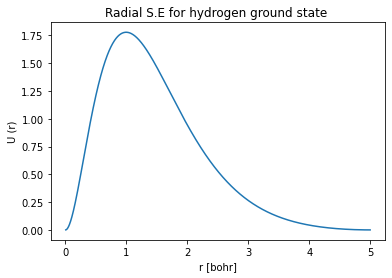

In [3]:
# Task 3
def generate_wavefunction(rho):
    #Coefficient matrix
    A = np.diag((h**-2 -rho**-1),0)+np.diag(-np.ones(N-1)/(2*h**2),1)+np.diag(-np.ones(N-1)/(2*h**2),-1)
    #Eigenvalues & eigenvectors:
    (Eigenvalues,Eigenvectors) = np.linalg.eig(A)
  
    # X contains N eigenvalues, build the wavefunction
    #with the lowest eigenvalue:
    
    temp = Eigenvectors[:,np.argmin(Eigenvalues)]
    temp = temp*(np.sqrt(np.trapz(temp**2,rho))*np.sign(temp[0])**-1)
    
    wavefunction = (np.sqrt(4*np.pi)*temp*rho**-1)
    
    #Normalize
    wavefunction = wavefunction/(np.trapz(wavefunction,rho))
    epsilon = np.min(Eigenvalues).real
    
    return (epsilon,wavefunction)

psi = generate_wavefunction(rho)

#Plot radial solution to S.E and the Hydrogen ground state
hydrogen_wavefunction_FDM = generate_wavefunction(rho)
epsilon = hydrogen_wavefunction_FDM[0]
psi = np.array(hydrogen_wavefunction_FDM[1])

#Convert to electron volts:
E_ground = epsilon *27.2113966
print("Calculated ground state energy: " + str(E_ground))
plt.figure()
plt.plot(rho, 4*np.pi*rho**2*np.abs(psi)**2)
plt.title("Radial S.E for hydrogen ground state " )
plt.xlabel("r [bohr]")
plt.ylabel("U (r)")

In [4]:
# Task 4
threshold = 1e-5 # eV
iter = 10

V_sH = E_ground #   